Import Libraries

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

Load the dataset

In [99]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [100]:
# get catagorical columns
cat_cols = [col for col in df.columns if df[col].dtype=='object']
cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [101]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [102]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [103]:
# drop customer id column
df = df.drop(['customerID'] ,axis=1)

In [104]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [105]:
# change total charges to numeric datatype
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [106]:
# display null value rows in totalcharges
df[np.isnan(df['TotalCharges'])]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [107]:
# drop rows where tenure is 0
print("Before:", df.shape)
df = df.drop(labels=df[df['tenure']==0].index, axis=0)
print("After:", df.shape)
df.isna().sum()

Before: (7043, 20)
After: (7032, 20)


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Exploratory data analysis

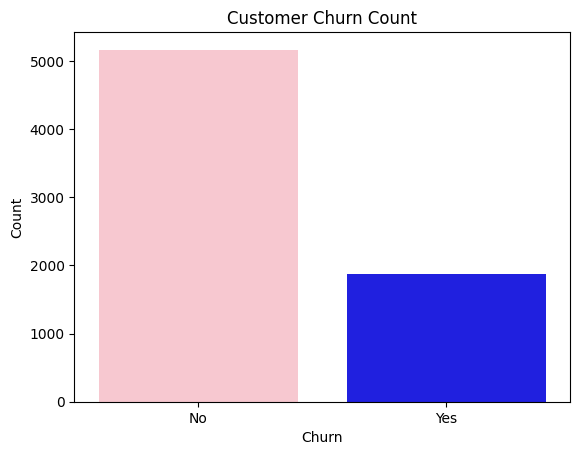

In [108]:
custom_colors = ['pink', 'blue','green','red']

sns.countplot(x='Churn', data=df, palette=custom_colors)

plt.title('Customer Churn Count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

dataset is slightly imbalanced, suggest to use sampling techniques to balance the dataset

<Axes: xlabel='Churn', ylabel='count'>

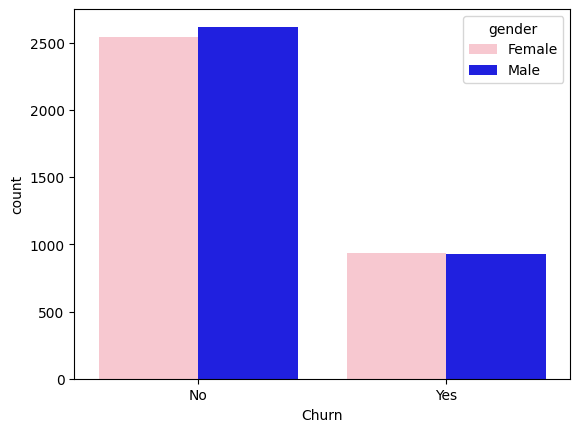

In [109]:
sns.countplot(x='Churn', hue='gender', data=df, palette=custom_colors)

<Axes: xlabel='Churn', ylabel='count'>

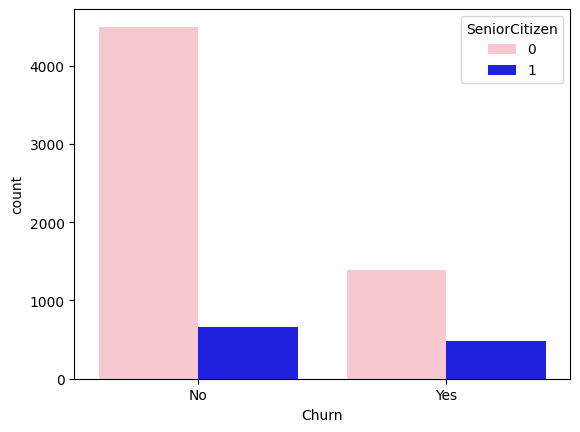

In [110]:
sns.countplot(x='Churn', hue='SeniorCitizen', data=df, palette=custom_colors)

### Senior citizen are more likely to churn:
The blue bar (senior citizens) on the 'Yes' side is much more significant in relation to its 'No' counterpart than the pink bar. This indicates that senior citizens are disproportionately more likely to churn compared to non-senior citizens. This suggests that the senior citizen status is a strong indicator of churn probability.

<Axes: xlabel='Churn', ylabel='count'>

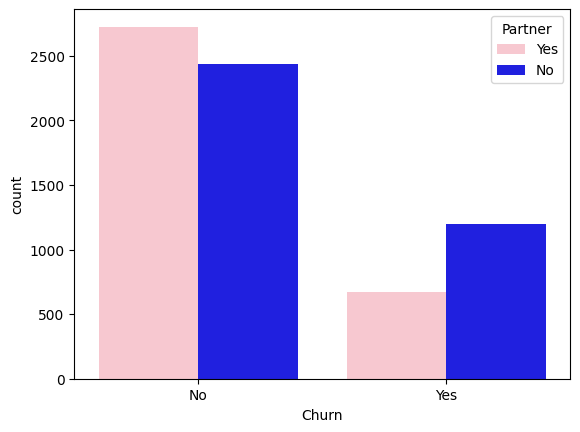

In [111]:
sns.countplot(x='Churn', hue='Partner', data=df, palette=custom_colors)

### single person is more prone to churn 


<Axes: xlabel='Churn', ylabel='count'>

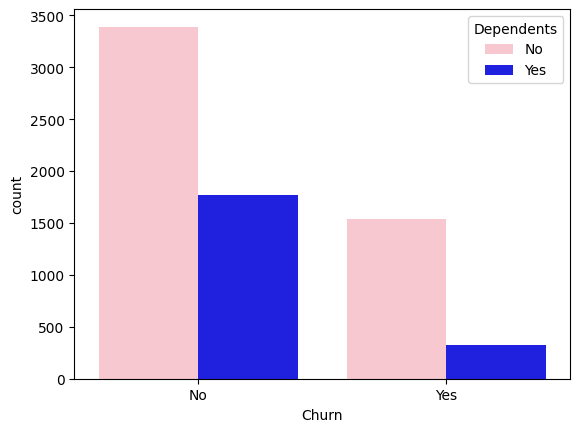

In [112]:
sns.countplot(x='Churn', hue='Dependents', data=df, palette=custom_colors)

### those who  doesnt have any dependents or single people are more likely to churn.

if the customer has a family , all of them prefer to use same service and retention is high.

In [113]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='Churn', ylabel='count'>

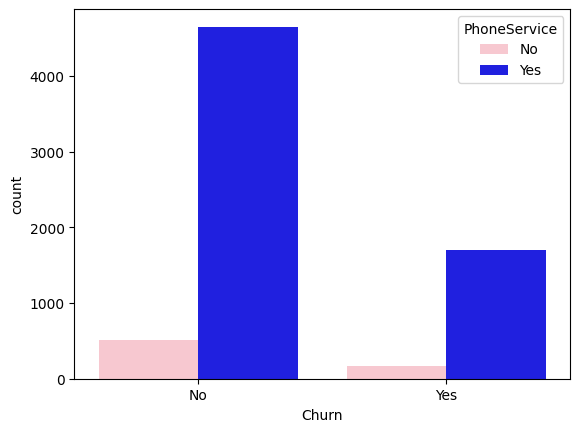

In [114]:
sns.countplot(x='Churn', hue='PhoneService', data=df, palette=custom_colors)

<Axes: xlabel='Churn', ylabel='count'>

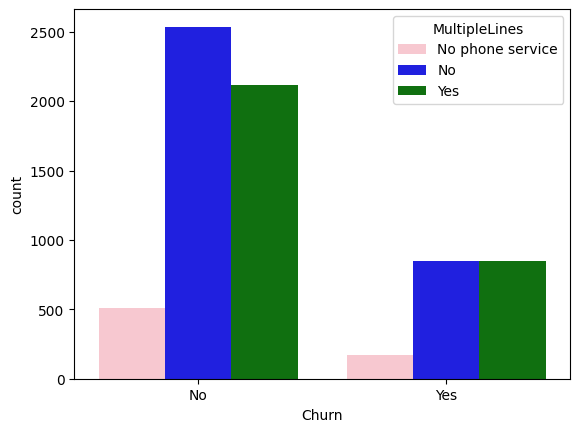

In [115]:
sns.countplot(x='Churn', hue='MultipleLines', data=df, palette=custom_colors)

In [116]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='Churn', ylabel='count'>

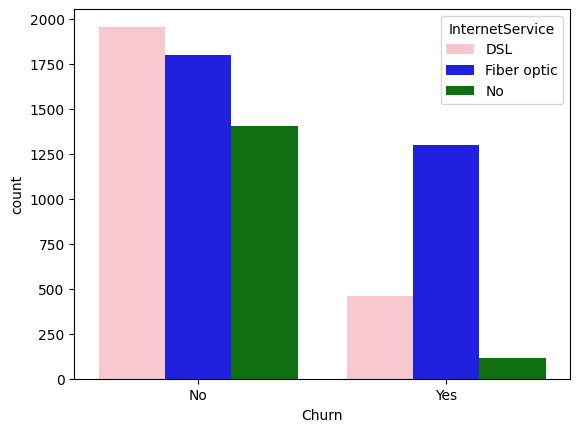

In [117]:
sns.countplot(x='Churn', hue='InternetService', data=df, palette=custom_colors)

### Those who have opted for fiber optics are more likey to churn also those who have DSL service are more likely to retench.

In [118]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='Churn', ylabel='count'>

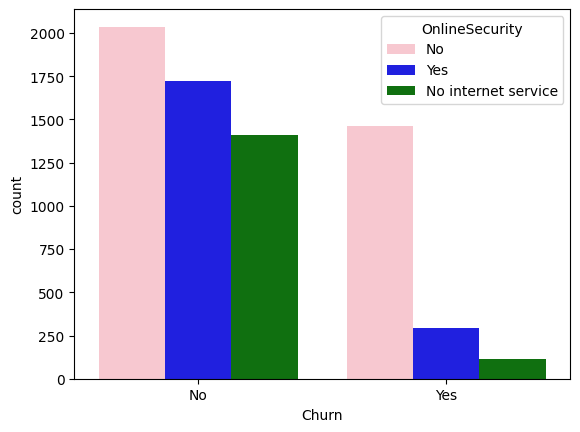

In [119]:
sns.countplot(x='Churn', hue='OnlineSecurity', data=df, palette=custom_colors)

### People who doesnt have online security are more likely to churn

<Axes: xlabel='Churn', ylabel='count'>

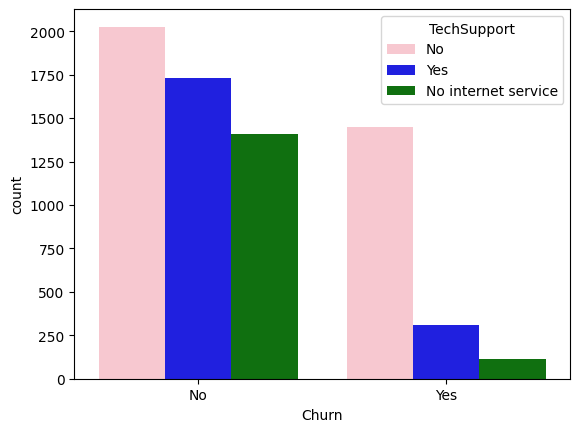

In [120]:
sns.countplot(x='Churn', hue='TechSupport', data=df, palette=custom_colors)

### PEOPLE  who doesnt have tech support are more likely to churn 

<Axes: xlabel='Churn', ylabel='count'>

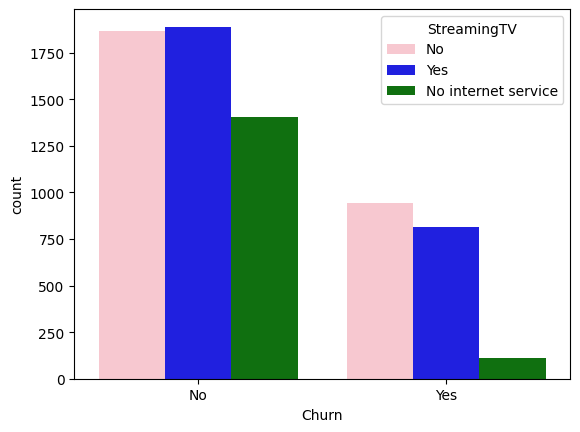

In [121]:
sns.countplot(x='Churn', hue='StreamingTV', data=df, palette=custom_colors)

In [122]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='Churn', ylabel='count'>

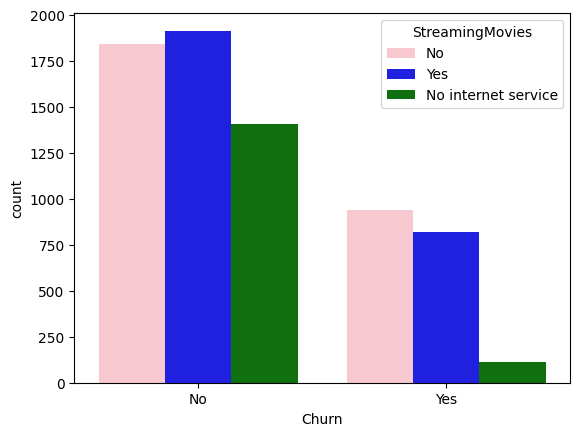

In [123]:
sns.countplot(x='Churn', hue='StreamingMovies', data=df, palette=custom_colors)

<Axes: xlabel='Churn', ylabel='count'>

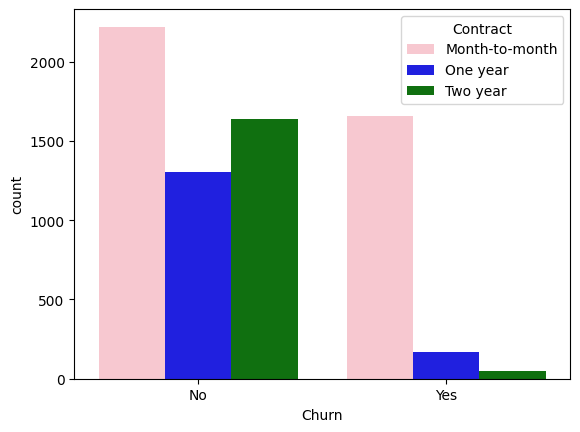

In [124]:
sns.countplot(x='Churn', hue='Contract', data=df, palette=custom_colors)

### Those who have month to month contract are more likely to churn.
### And people who are on one year and two year contract are are very less likely to retench.

In [125]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='Churn', ylabel='count'>

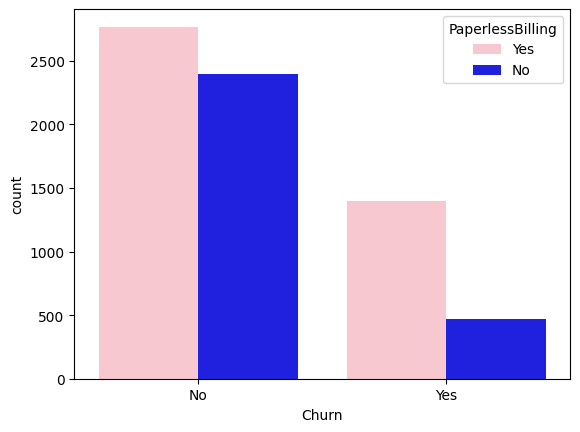

In [126]:
sns.countplot(x='Churn', hue='PaperlessBilling', data=df, palette=custom_colors)

<Axes: xlabel='Churn', ylabel='count'>

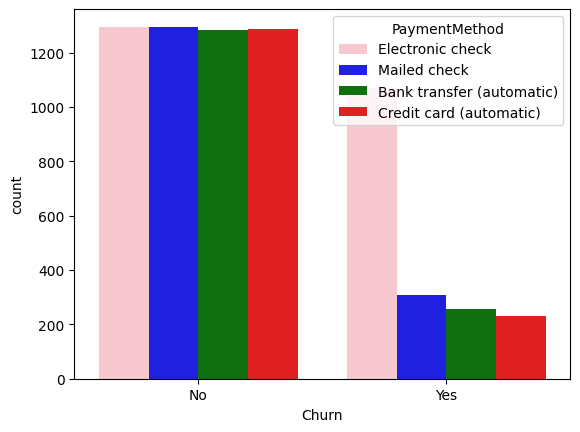

In [127]:
sns.countplot(x='Churn', hue='PaymentMethod', data=df, palette=custom_colors)

### People who have opted for Electronic Check payment method are more likely to churn.

In [128]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

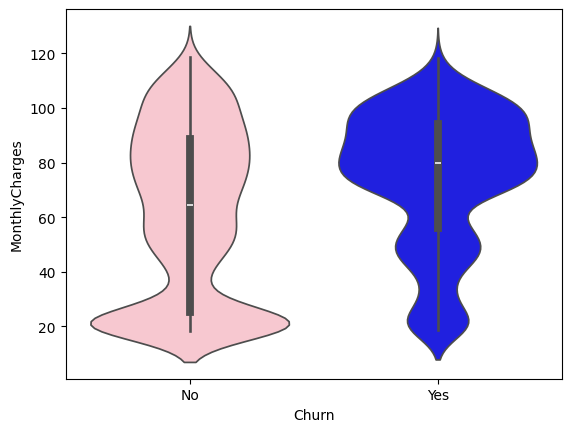

In [129]:
sns.violinplot(x='Churn', y='MonthlyCharges', data=df,palette=custom_colors)

### People who have high monthly charges are more likely to churn.

<Axes: xlabel='Churn', ylabel='TotalCharges'>

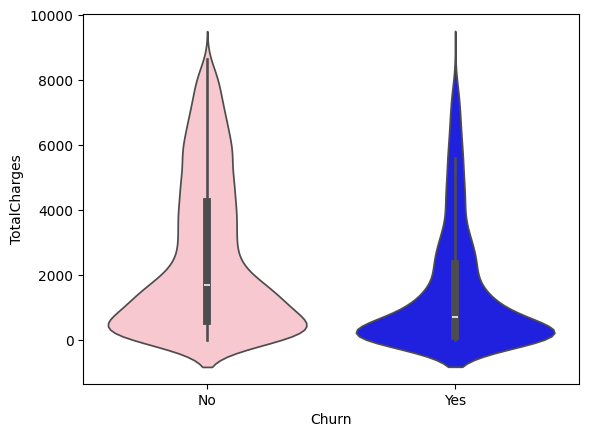

In [130]:
sns.violinplot(x='Churn', y='TotalCharges', data=df, palette=custom_colors)

<Axes: xlabel='Churn', ylabel='tenure'>

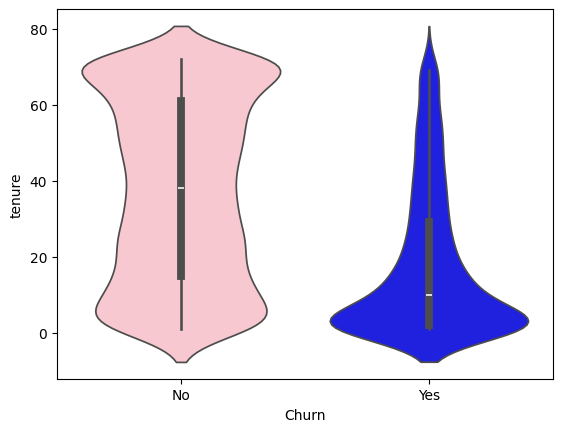

In [131]:
sns.violinplot(x='Churn', y='tenure', data=df, palette=custom_colors)

### Those who have low tenure or have subscribed of rless no.of months are more likely to churn 

<Axes: xlabel='Churn', ylabel='tenure'>

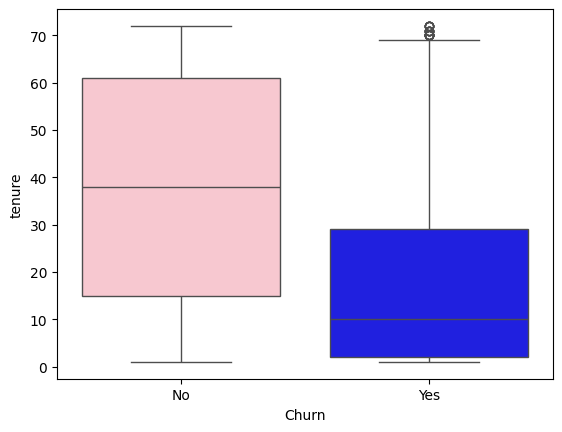

In [132]:
sns.boxplot(data=df, x='Churn', y='tenure',palette=custom_colors)

<Axes: xlabel='TotalCharges', ylabel='Density'>

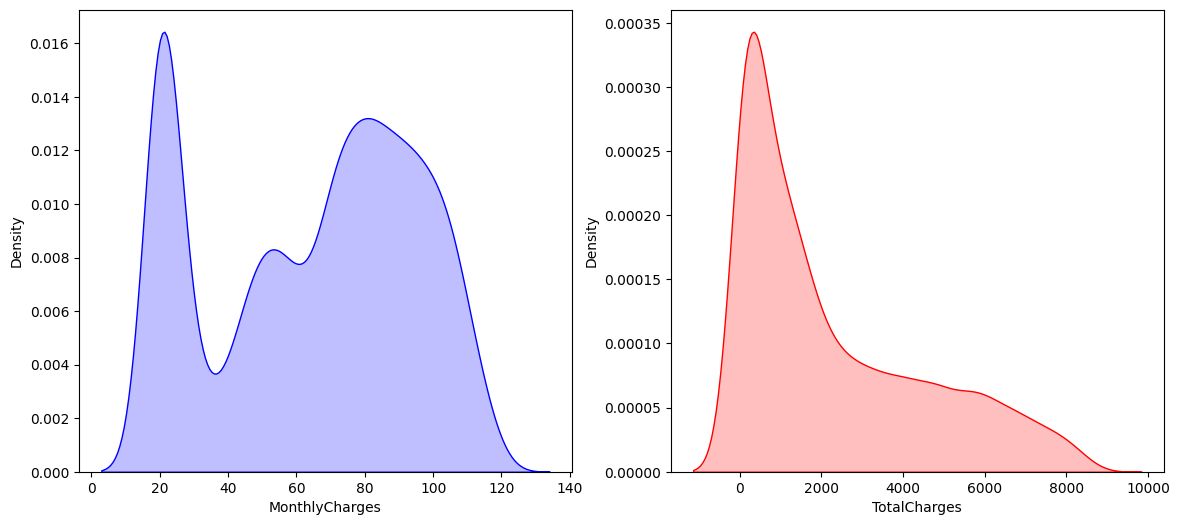

In [133]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.kdeplot(df['MonthlyCharges'], ax=axes[0], color='blue', shade=True)
sns.kdeplot(df['TotalCharges'], ax=axes[1], color='red', shade=True)

# Correlation Matrix

<Axes: >

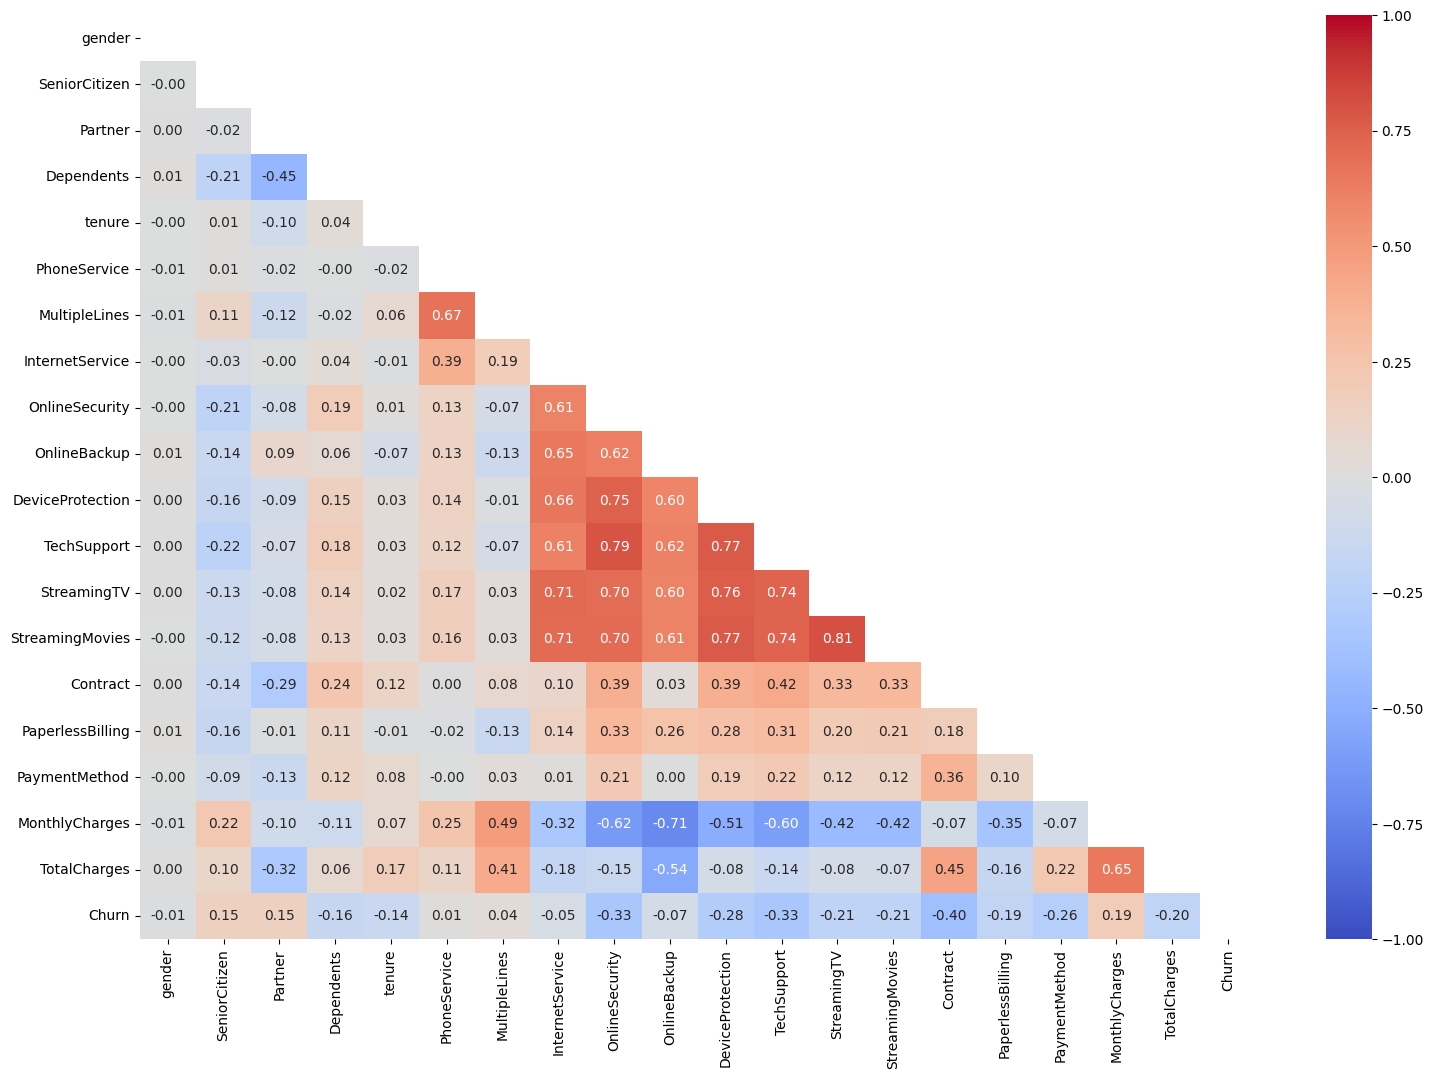

In [134]:
plt.figure(figsize=(18,12))
corr = df.apply(lambda x: pd.factorize(x)[0] if x.dtype!='float64' else x).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr , mask=mask, cmap='coolwarm', vmax=1 , vmin=-1, center=0, annot=True, fmt='.2f')

Label Encoder

In [135]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [136]:
cols = [col for col in df.columns if df[col].dtype=='object']
cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [137]:
from sklearn.preprocessing import LabelEncoder
cat_cols = [col for col in cat_cols if col in df.columns]

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,74,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,3624,0


In [138]:
#perform log transformation
df['MonthlyCharges']= np.log(df["MonthlyCharges"]+1)
df['TotalCharges']= np.log(df["TotalCharges"]+1)

<Axes: xlabel='TotalCharges', ylabel='Density'>

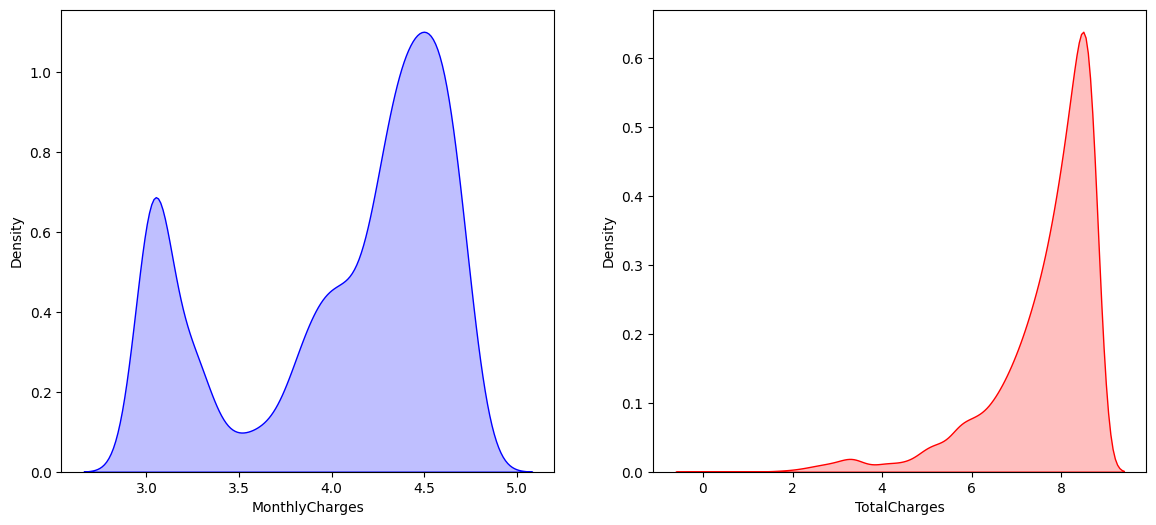

In [139]:
fig, axes = plt.subplots(1,2, figsize=(14,6))
sns.kdeplot(df['MonthlyCharges'], ax=axes[0], color='blue', shade=True)
sns.kdeplot(df['TotalCharges'], ax=axes[1], color='red', shade=True)

Train Test Split

In [140]:
X=df.drop(columns=['Churn'])
y=df['Churn']

In [141]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model Training

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

#intialize and train model
model = LogisticRegression()
model.fit(X_train, y_train)

#get predictions
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.62      0.56      0.59       374

    accuracy                           0.79      1407
   macro avg       0.73      0.72      0.72      1407
weighted avg       0.79      0.79      0.79      1407



In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the model and the parameter grid to search
model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='f1', n_jobs=-1, verbose=1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation F1 score: ", grid_search.best_score_)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print the classification report for the best model
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 4, 'n_estimators': 100}
Best cross-validation F1 score:  0.5839733215384734
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [144]:
cat_cols.remove('Churn')
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges']

In [145]:
# Make sure all values in categorical columns are strings
for col in cat_cols:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)


In [ ]:
from catboost import CatBoostClassifier

#intialize and train model
model = CatBoostClassifier(verbose=False)
model.fit(X_train, y_train, cat_features=cat_cols)

#get predictions
y_pred = model.predict(X_test)

print(classification_report(y_test,y_pred))


## Confusion Matrix

<Axes: >

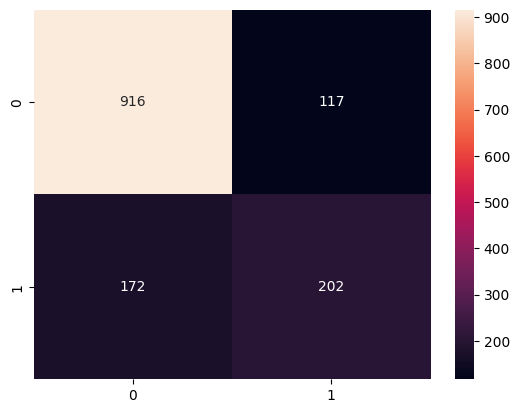

In [ ]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')